# This notebook provide examples of using the Scale-Space Histogram Segmentation algorithm on 1D histogram and some application on image segmentation.

This algorithm is described in J.Gilles, K.Heal, "A parameterless scale-space approach to find meaningful modes in histograms - Application to image and spectrum segmentation". International Journal of Wavelets, Multiresolution and Information Processing, Vol.12, No.6, 1450044-1--1450044-17, December 2014

ArXiV: https://arxiv.org/abs/1401.2686

Note: this implementation uses sparse matrices to store the scale-space plane and uses a discrete Gaussian kernel based on Bessel functions to speed up the computation.

Author: Jerome Gilles

Date: 12/13/2024

## 1D Case

We start by loading a test histogram and plot it.

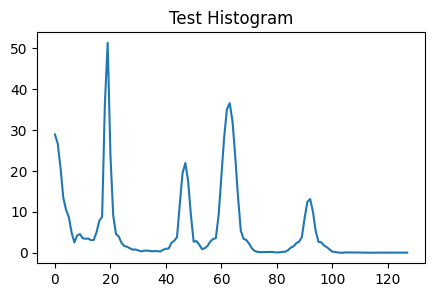

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sshs


hist = np.genfromtxt('histotest.csv', delimiter=',')

n=np.linspace(0,np.size(hist)-1,np.size(hist))

fig1, ax1 = plt.subplots(figsize=(5,3))
ax1.plot(n,hist)
ax1.set_title(r"Test Histogram")
plt.show()


Next we build the scale-space representation and detect the meaningful boundaries which one of the available method: "otsu", "halfnormal", "empiricallaw", "mean", or "kmeans"

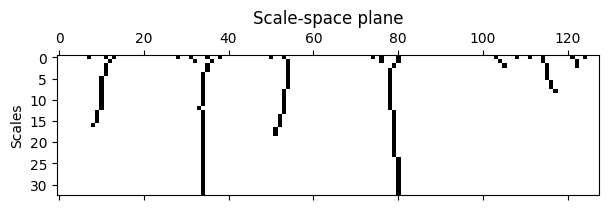

In [2]:
bounds, plane, L, th = sshs.SSHS_GSS_BoundariesDetect(hist,"otsu")

fig2, ax2 = plt.subplots(figsize=(7,5))
ax2.matshow(plane.transpose().toarray(),cmap=plt.cm.gray_r)
ax2.set_title(r"Scale-space plane")
ax2.set_ylabel('Scales')
plt.show()

We plot the detected boundaries on top of the histogram

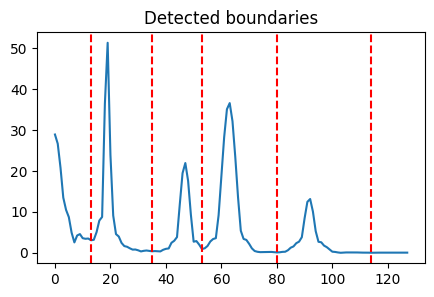

In [3]:
#dir(plane)
sshs.SSHS_PlotBoundaries(hist,bounds,"Detected boundaries")

# 2D Segmentation

## Grayscale case

In [4]:
import matplotlib.image as mpimg

# load grayscale image
img = 255 * mpimg.imread('x21.png')
img = img.astype(int)


# plt.imshow(img, cmap="gray", interpolation='none')
# plt.title('Original')
# plt.axis('off')

# axg[0].imshow(img, cmap="gray", interpolation='none')
# axg[0].set_title(r"Original")

Extract the image histogram

In [5]:
himg = np.histogram(img.flatten(),np.max(img)+1)[0]

# ni=np.linspace(0,np.size(himg)-1,np.size(himg))

# figimg, aximg = plt.subplots(figsize=(5,3))
# aximg.plot(ni,himg)
# aximg.set_title(r"Grayscale image histogram")
# plt.show()

We segment the histogram

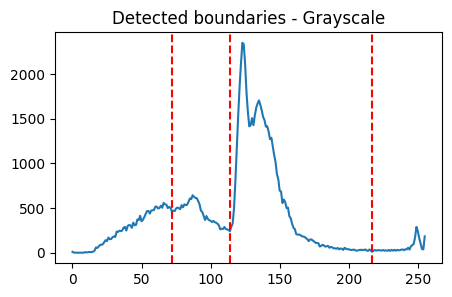

In [6]:
boundsimg, planeimg, Limg, thimg = sshs.SSHS_GSS_BoundariesDetect(himg,"otsu")
sshs.SSHS_PlotBoundaries(himg,boundsimg,"Detected boundaries - Grayscale")

Define the pixel classes based on the segmented histogram

In [7]:
classes = np.zeros(np.size(himg))

for i in range(0,np.size(boundsimg)-1):
    classes[boundsimg[i]:boundsimg[i+1]] = i+1

classes[boundsimg[-1]:np.size(classes)] = np.size(boundsimg)


ims = np.zeros(np.shape(img))
for i in range(0,np.shape(ims)[0]):
    for j in range(0,np.shape(ims)[1]):
        ims[i,j] = classes[img[i,j]]


Plot the original image and its segmented version

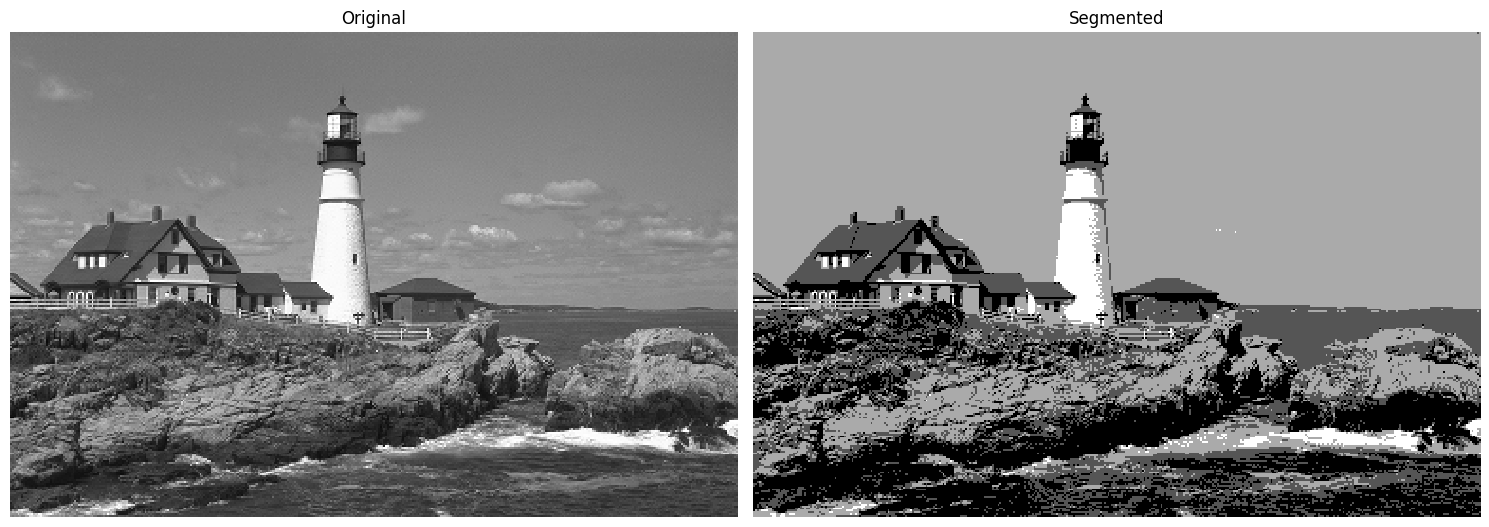

In [8]:
figg, axg = plt.subplots(1, 2, figsize=(15, 15))
axg[0].imshow(img, cmap="gray", interpolation='none')
axg[0].set_title(r"Original")
axg[0].axis('off')
axg[1].imshow(ims, cmap="gray", interpolation='none')
axg[1].set_title(r"Segmented")
axg[1].axis('off')
figg.tight_layout()

## Color case

In [ ]:
imc = mpimg.imread('c15.png')
#imc = imc.astype(int)

from skimage.color import rgb2hsv
from skimage.color import hsv2rgb

# convert RGB to HSV
imchsv = 255 * rgb2hsv(imc)
Vc = imchsv[:,:,2]
Vc = Vc.astype(int)

Extract the V channel and segment it via its histogram

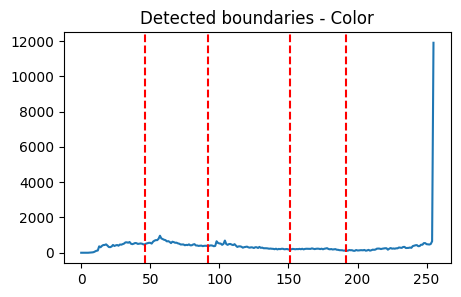

In [10]:
hv = np.histogram(Vc.flatten(),np.max(Vc)+1)[0]

boundsv, planev, Lv, thv = sshs.SSHS_GSS_BoundariesDetect(hv,"otsu")

sshs.SSHS_PlotBoundaries(hv,boundsv,"Detected boundaries - Color")

Find the classes and assign the new V channel and convert it back to RGB

In [11]:
classesv = np.zeros(np.size(hv))

for i in range(0,np.size(boundsv)-1):
    classesv[boundsv[i]:boundsv[i+1]] = i+1

classesv[boundsv[-1]:np.size(classesv)] = np.size(boundsv)


imchsvs = imchsv
for i in range(0,np.shape(imchsvs)[0]):
    for j in range(0,np.shape(imchsvs)[1]):
        imchsvs[i,j,2] = classesv[Vc[i,j]] * 255 / np.size(boundsv)

imchsvs = imchsvs.astype(float)
imchsvs = imchsvs/255

imcs = hsv2rgb(imchsvs)


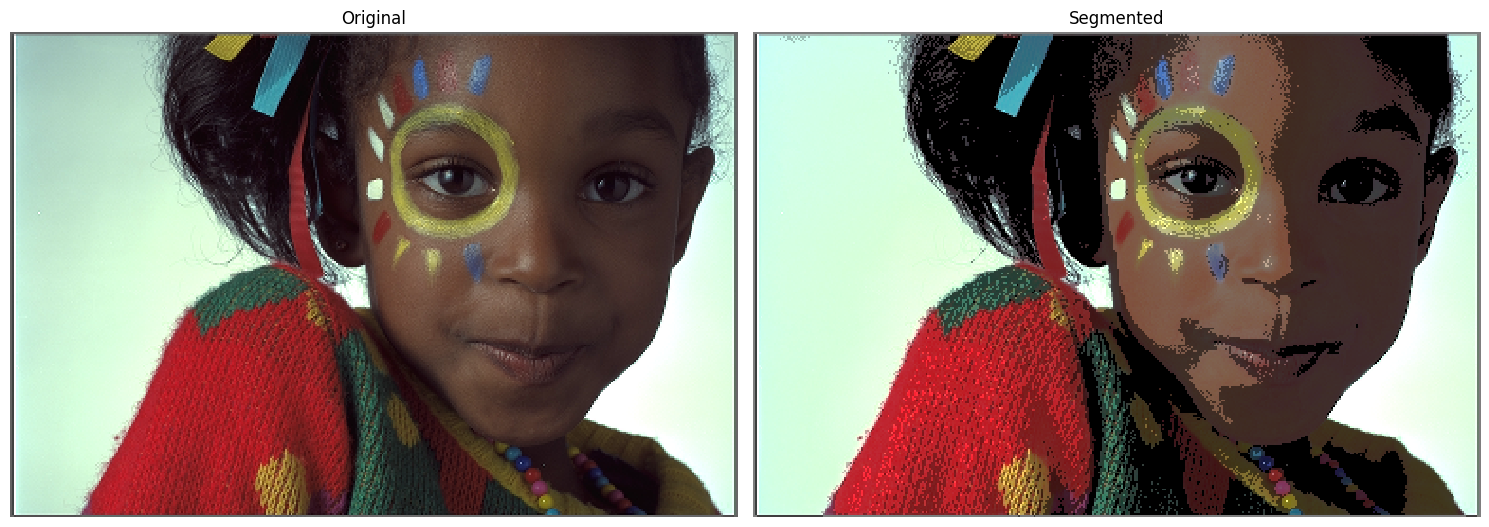

In [12]:
figc, axc = plt.subplots(1, 2, figsize=(15, 15))
axc[0].imshow(imc, interpolation='none')
axc[0].set_title(r"Original")
axc[0].axis('off')
axc[1].imshow(imcs, interpolation='none')
axc[1].set_title(r"Segmented")
axc[1].axis('off')
figc.tight_layout()